## Homework 5 Implement the Kernelized K-Means 

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy import exp
import random
from scipy.spatial.distance import pdist, squareform
import numpy.matlib

In [2]:
class Kernel_KMeans:
    def __init__(self, K=2, gamma = 1, max_iters=100, plot_steps=False):
        self.K = K
        self.gamma = gamma
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Z is a matrix with size N_samples x cluster_number
        # In each row, 1 only occurs at the column representing the cluster, other element are zeros
        # For example, if there are three clusters (K=3), a row [0, 1, 0]
        # means the element belongs to the second cluster 
        self.Z = []
        
    def predict(self, X):
        self.X = X
        # each row of X is a sample, number of columns are number of features 
        self.N, self.n_features = X.shape
        
        sq_dists = pdist(X, 'sqeuclidean')
        mat_sq_dists = squareform(sq_dists)
        
        # Convert pairwise distances into a square matrix.
        
        Ke = exp(-self.gamma * mat_sq_dists)
        #K(xn,xn) 
        # Compute the symmetric kernel matrix.
        N = self.X.shape[0]
        self.Z = np.matlib.repmat([1, 0],N,1)
        s = np.sum(self.X*self.X,1)
        pos = np.argmin(s)
        self.Z[pos,:]= [0,1]
     
        di = np.zeros((N,self.K))
        converged = 0
        while converged == 0:
            Nk = np.sum(self.Z,0)
        
            for k in np.arange(self.K):
                tmp=np.diag(Ke).reshape(-1,1) - 2/Nk[k]*np.sum(np.matlib.repmat(self.Z[:,k].T,N,1)*Ke,1).reshape(-1,1) + \
                 1/(Nk[k]*Nk[k])*np.sum(np.matmul(self.Z[:,k].reshape(-1,1),self.Z[:,k].reshape(1,-1))*Ke)
            #    di[:,k]=tmp
                di[:,k]=np.squeeze(tmp)
                
            Z_old=self.Z
            self.Z=di==np.matlib.repmat(np.min(di,1).reshape(-1,1),1,self.K)
            self.Z=np.multiply(self.Z, 1)
       
      
            if np.sum(self.Z!=Z_old)==0:
                converged=1
                
                    
            if self.plot_steps:
                 self.plot()
        

      



    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 4))
        for k in np.arange(self.K):
            index=np.where(self.Z[:,k]==1)
            point = self.X[index].T
            ax.scatter(*point)

        plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_4440\1773491674.py:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  Ke = exp(-self.gamma * mat_sq_dists)


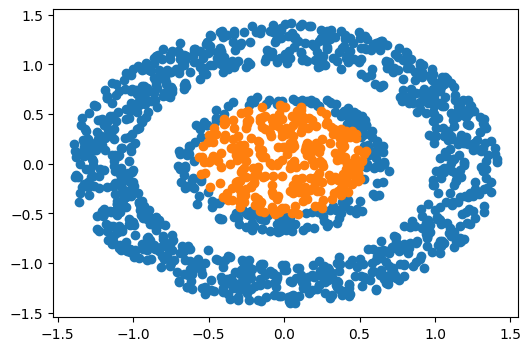

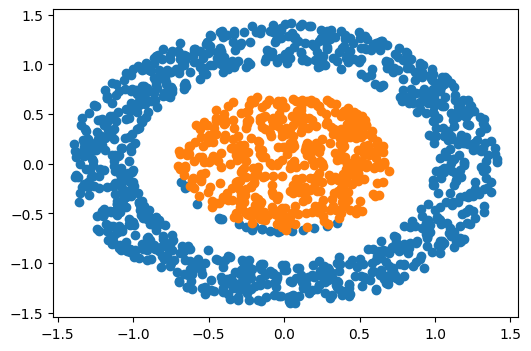

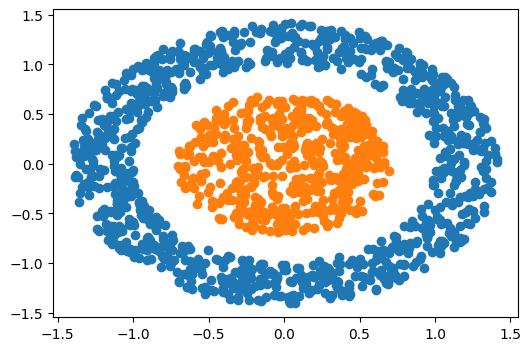

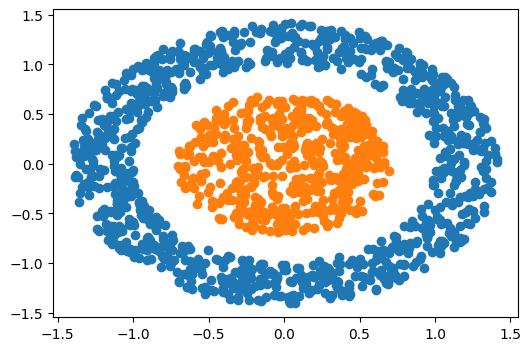

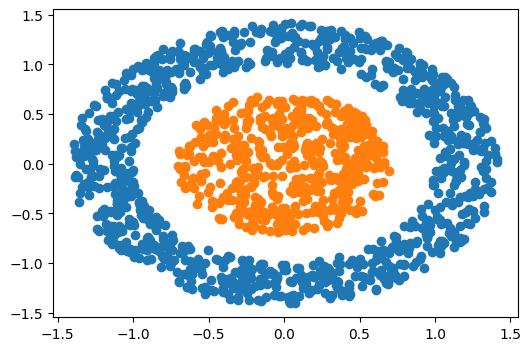

In [3]:
# Testing
import csv
import pandas as pd
from sklearn.datasets import make_moons

#    X, y = make_moons(100, random_state=123)
df = pd.read_csv('X.csv', header=None, skiprows=0, dtype=np.float32)  
X = df.to_numpy()
clusters=2
k = Kernel_KMeans(K=clusters, gamma = 1, max_iters=200, plot_steps=True)
y_pred = k.predict(X)

k.plot()

In [4]:
# The following are hints

In [5]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy import exp
import random
from scipy.spatial.distance import pdist, squareform

df = pd.read_csv('X.csv', header=None, skiprows=0, dtype=np.float32)  
X = df.to_numpy()

#取top 10 data
X = X[0:10,:]

K = 2
print(X)
print(X.shape)

[[ 0.28395  -0.63063 ]
 [-0.19803   0.61805 ]
 [ 0.31138   0.61    ]
 [ 0.086885  0.53374 ]
 [ 0.31307   0.36939 ]
 [-1.0001    0.95492 ]
 [ 0.31112  -0.1668  ]
 [-0.49512   0.28782 ]
 [-1.0849   -0.39157 ]
 [-0.90562  -0.55786 ]]
(10, 2)


In [30]:
sq_dists = pdist(X, 'sqeuclidean') # C(100,2)=100x99/2!=50x99=4950
# Convert pairwise distances into a square matrix.
print(sq_dists)
mat_sq_dists = squareform(sq_dists)  


# Compute the symmetric kernel matrix.
gamma=1
Ke = exp(-gamma * mat_sq_dists)


[1.79150645 1.53991528 1.39459211 1.00088803 4.16275328 0.21587649
 1.4505005  1.93090007 1.42037221 0.25956334 0.08828473 0.32305498
 0.75679773 0.87522322 0.1973143  1.80587095 1.8834479  0.0562136
 0.05789603 1.83894962 0.60341834 0.75424218 2.95274039 2.844986
 0.07817057 1.35892902 0.54103762 0.39920644 2.2292787  2.17665669
 2.06726085 0.28750354 0.65982472 2.53338032 2.34499788 2.9775537
 0.70002722 1.82022635 2.29742984 0.85670229 1.99939346 1.63338412
 0.80941128 0.88368495 0.0597937 ]
(10, 10)


C:\Users\charl\AppData\Local\Temp\ipykernel_4440\1650636738.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  Ke = exp(-gamma * mat_sq_dists)


In [32]:
print(mat_sq_dists)

[[0.         1.79150645 1.53991528 1.39459211 1.00088803 4.16275328
  0.21587649 1.4505005  1.93090007 1.42037221]
 [1.79150645 0.         0.25956334 0.08828473 0.32305498 0.75679773
  0.87522322 0.1973143  1.80587095 1.8834479 ]
 [1.53991528 0.25956334 0.         0.0562136  0.05789603 1.83894962
  0.60341834 0.75424218 2.95274039 2.844986  ]
 [1.39459211 0.08828473 0.0562136  0.         0.07817057 1.35892902
  0.54103762 0.39920644 2.2292787  2.17665669]
 [1.00088803 0.32305498 0.05789603 0.07817057 0.         2.06726085
  0.28750354 0.65982472 2.53338032 2.34499788]
 [4.16275328 0.75679773 1.83894962 1.35892902 2.06726085 0.
  2.9775537  0.70002722 1.82022635 2.29742984]
 [0.21587649 0.87522322 0.60341834 0.54103762 0.28750354 2.9775537
  0.         0.85670229 1.99939346 1.63338412]
 [1.4505005  0.1973143  0.75424218 0.39920644 0.65982472 0.70002722
  0.85670229 0.         0.80941128 0.88368495]
 [1.93090007 1.80587095 2.95274039 2.2292787  2.53338032 1.82022635
  1.99939346 0.809411

In [31]:
print(Ke)

[[1.         0.16670884 0.21439927 0.24793414 0.3675529  0.01556465
  0.80583483 0.23445291 0.14501761 0.24162407]
 [0.16670884 1.         0.77138834 0.91550017 0.72393405 0.46916642
  0.41676898 0.82093258 0.16433127 0.1520649 ]
 [0.21439927 0.77138834 1.         0.94533719 0.94374806 0.15898433
  0.54693881 0.47036693 0.05219647 0.05813508]
 [0.24793414 0.91550017 0.94533719 1.         0.92480667 0.2569358
  0.5821439  0.6708522  0.10760602 0.1134201 ]
 [0.3675529  0.72393405 0.94374806 0.92480667 1.         0.1265319
  0.75013391 0.51694194 0.0793902  0.09584741]
 [0.01556465 0.46916642 0.15898433 0.2569358  0.1265319  1.
  0.05091724 0.49657179 0.16198908 0.10051686]
 [0.80583483 0.41676898 0.54693881 0.5821439  0.75013391 0.05091724
  1.         0.42455985 0.13541739 0.19526765]
 [0.23445291 0.82093258 0.47036693 0.6708522  0.51694194 0.49657179
  0.42455985 1.         0.44512004 0.41325727]
 [0.14501761 0.16433127 0.05219647 0.10760602 0.0793902  0.16198908
  0.13541739 0.4451200

In [7]:

row=np.zeros((1,K))
row[0,0]=1
print(K)
print(row)

2
[[1. 0.]]


In [8]:
from numpy import matlib
N=X.shape[0]
Z = np.matlib.repmat(row,N,1); 
#Z = np.matlib.repmat([1, 0],N,1); 
print(N)
print(Z)

10
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:

s = np.sum(X*X,1)
pos = np.argmin(s)

Z[pos,:]= [0,1]
Z[pos,:]=0
Z[pos,-1]=1
print(Z)
Z_old=Z
test1=sum(Z,0)
test2=sum(Z_old, 0)
print(test1)
print(test2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[9. 1.]
[9. 1.]


In [10]:
di = np.zeros((N,K))
print(di)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [11]:
Nk = np.sum(Z,0)
print(Nk)

[9. 1.]


In [12]:
np.diag(Ke)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
np.diag(Ke).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [14]:
np.matlib.repmat(Z[:,0].T,N,1)*Ke

array([[1.        , 0.16670884, 0.21439927, 0.24793414, 0.3675529 ,
        0.01556465, 0.        , 0.23445291, 0.14501761, 0.24162407],
       [0.16670884, 1.        , 0.77138834, 0.91550017, 0.72393405,
        0.46916642, 0.        , 0.82093258, 0.16433127, 0.1520649 ],
       [0.21439927, 0.77138834, 1.        , 0.94533719, 0.94374806,
        0.15898433, 0.        , 0.47036693, 0.05219647, 0.05813508],
       [0.24793414, 0.91550017, 0.94533719, 1.        , 0.92480667,
        0.2569358 , 0.        , 0.6708522 , 0.10760602, 0.1134201 ],
       [0.3675529 , 0.72393405, 0.94374806, 0.92480667, 1.        ,
        0.1265319 , 0.        , 0.51694194, 0.0793902 , 0.09584741],
       [0.01556465, 0.46916642, 0.15898433, 0.2569358 , 0.1265319 ,
        1.        , 0.        , 0.49657179, 0.16198908, 0.10051686],
       [0.80583483, 0.41676898, 0.54693881, 0.5821439 , 0.75013391,
        0.05091724, 0.        , 0.42455985, 0.13541739, 0.19526765],
       [0.23445291, 0.82093258, 0.4703669

In [15]:
k=0
2/Nk[k]*np.sum(np.matlib.repmat(Z[:,k].T,N,1)*Ke,1).reshape(-1,1)

array([[0.58516764],
       [1.1520059 ],
       [1.02545682],
       [1.15164273],
       [1.06194514],
       [0.61916907],
       [0.86844057],
       [1.12633237],
       [0.68835767],
       [0.69262767]])

In [16]:
k=0
np.sum(np.matmul(Z[:,k],Z[:,k].T)*Ke)

407.503239270199

In [17]:
Z[:,k].reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [18]:
Z[:,k].reshape(1,-1)

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1.]])

In [19]:
np.sum(np.matmul(Z[:,k].reshape(-1,1),Z[:,k].reshape(1,-1))*Ke)

36.462172573748965

In [20]:
for k in np.arange(K):
    tmp=np.diag(Ke).reshape(-1,1) - 2/Nk[k]*np.sum(np.matlib.repmat(Z[:,k].T,N,1)*Ke,1).reshape(-1,1) + \
    1/(Nk[k]*Nk[k])*np.sum(np.matmul(Z[:,k].reshape(-1,1),Z[:,k].reshape(1,-1))*Ke)
#    di[:,k]=tmp
    di[:,k]=np.squeeze(tmp)
    print(k)
    print(di)

0
[[0.86498264 0.        ]
 [0.29814437 0.        ]
 [0.42469346 0.        ]
 [0.29850755 0.        ]
 [0.38820514 0.        ]
 [0.83098121 0.        ]
 [0.58170971 0.        ]
 [0.32381791 0.        ]
 [0.7617926  0.        ]
 [0.75752261 0.        ]]
1
[[0.86498264 0.38833035]
 [0.29814437 1.16646205]
 [0.42469346 0.90612237]
 [0.29850755 0.83571221]
 [0.38820514 0.49973217]
 [0.83098121 1.89816552]
 [0.58170971 0.        ]
 [0.32381791 1.15088029]
 [0.7617926  1.72916521]
 [0.75752261 1.60946471]]


In [21]:
np.min(di,1)

array([0.38833035, 0.29814437, 0.42469346, 0.29850755, 0.38820514,
       0.83098121, 0.        , 0.32381791, 0.7617926 , 0.75752261])

In [22]:
np.min(di,1).reshape(-1,1)

array([[0.38833035],
       [0.29814437],
       [0.42469346],
       [0.29850755],
       [0.38820514],
       [0.83098121],
       [0.        ],
       [0.32381791],
       [0.7617926 ],
       [0.75752261]])

In [23]:
np.matlib.repmat(np.min(di,1).reshape(-1,1),1,K)

array([[0.38833035, 0.38833035],
       [0.29814437, 0.29814437],
       [0.42469346, 0.42469346],
       [0.29850755, 0.29850755],
       [0.38820514, 0.38820514],
       [0.83098121, 0.83098121],
       [0.        , 0.        ],
       [0.32381791, 0.32381791],
       [0.7617926 , 0.7617926 ],
       [0.75752261, 0.75752261]])

In [24]:
Z=di==np.matlib.repmat(np.min(di,1).reshape(-1,1),1,K)
print(Z)

[[False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]]


In [25]:
Z=np.multiply(Z, 1)
print(Z)

[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]


In [26]:
np.sum(Z!=Z_old)

2

In [27]:
np.sum(Z!=Z_old)==0

False

In [28]:
ind=np.where(Z[:,0]==1)
print(ind)

(array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int64),)


In [29]:
X[ind].T

array([[-0.19803 ,  0.31138 ,  0.086885,  0.31307 , -1.0001  , -0.49512 ,
        -1.0849  , -0.90562 ],
       [ 0.61805 ,  0.61    ,  0.53374 ,  0.36939 ,  0.95492 ,  0.28782 ,
        -0.39157 , -0.55786 ]], dtype=float32)